In [1]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 92 (delta 37), reused 58 (delta 17), pack-reused 0
Unpacking objects: 100% (92/92), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [28]:
import numpy as np

text = '''-2
 0
 2
 4
 6
 8
 10
 11
x
 35
 5
 -10
 2
 5
 3
 20
 38'''

text = ' '.join(text.split('\n')).split('x')

A = np.array([[float(x) for x in text[j].split()] for j in [0,1]])
A = np.transpose(A)
A

array([[ -2.,  35.],
       [  0.,   5.],
       [  2., -10.],
       [  4.,   2.],
       [  6.,   5.],
       [  8.,   3.],
       [ 10.,  20.],
       [ 11.,  38.]])

In [24]:
for x in A:
    print(x[0],'&',x[1])

-2.0 & 35.0
0.0 & 5.0
2.0 & -10.0
4.0 & 2.0
6.0 & 5.0
8.0 & 3.0
10.0 & 20.0
11.0 & 25.0


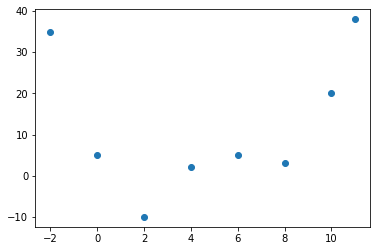

In [30]:
import matplotlib.pyplot as plt

plt.scatter(A[:,0],A[:,1])
plt.show()

In [31]:
from integracion import Trapezoid

trap = Trapezoid(datos=A)
trap.fit(0,1,3)

a,b,n will be ignored.


94.0

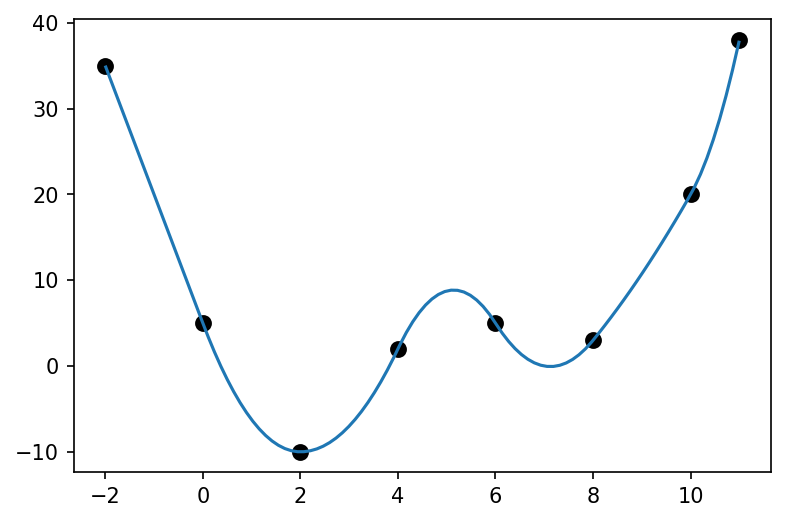

In [33]:
from interpolacion_aproximacion import Splines

spl = Splines()
spl.fit(data=A,grado=2)
spl.plot()

In [34]:
spl.coefs

array([[-4.3298698e-14, -1.5000000e+01,  5.0000000e+00],
       [ 3.7500000e+00, -1.5000000e+01,  5.0000000e+00],
       [ 3.0000000e+00, -1.2000000e+01,  2.0000000e+00],
       [-5.2500000e+00,  5.4000000e+01, -1.3000000e+02],
       [ 4.0000000e+00, -5.7000000e+01,  2.0300000e+02],
       [ 7.5000000e-01, -5.0000000e+00, -5.0000000e+00],
       [ 8.0000000e+00, -1.5000000e+02,  7.2000000e+02]])

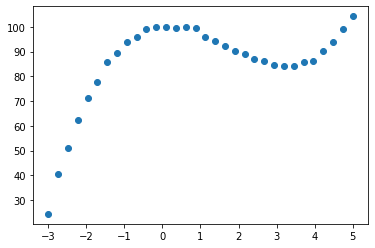

In [59]:
f = lambda x: x**3-5*x**2+x+100

xs = np.linspace(-3,5,32)
noise = np.random.normal(loc=0,scale=0.75,size=xs.shape)
ys = f(xs)+noise

import matplotlib.pyplot as plt

plt.scatter(xs,ys)
plt.show()

In [60]:
print("[",end='')
for x,y in zip(xs,ys):
    print(f"{round(x,4)},{round(y,4)}",end=';')
print("]")

[-3.0,24.4429;-2.7419,40.3609;-2.4839,50.9927;-2.2258,62.2378;-1.9677,71.3919;-1.7097,77.8202;-1.4516,85.851;-1.1935,89.2985;-0.9355,93.6608;-0.6774,95.7173;-0.4194,99.1932;-0.1613,99.7178;0.0968,99.8684;0.3548,99.4816;0.6129,99.9423;0.871,99.4931;1.129,96.0487;1.3871,94.1948;1.6452,92.3169;1.9032,90.2487;2.1613,88.8426;2.4194,87.1759;2.6774,86.3127;2.9355,84.5837;3.1935,84.2433;3.4516,84.1583;3.7097,85.7337;3.9677,86.2384;4.2258,90.3292;4.4839,93.8769;4.7419,99.257;5.0,104.2416;]


In [61]:
A = np.transpose(np.vstack((xs,ys)))
print(A)

[[-3.00000000e+00  2.44428587e+01]
 [-2.74193548e+00  4.03608657e+01]
 [-2.48387097e+00  5.09927385e+01]
 [-2.22580645e+00  6.22378322e+01]
 [-1.96774194e+00  7.13918694e+01]
 [-1.70967742e+00  7.78202134e+01]
 [-1.45161290e+00  8.58510384e+01]
 [-1.19354839e+00  8.92984986e+01]
 [-9.35483871e-01  9.36607634e+01]
 [-6.77419355e-01  9.57173400e+01]
 [-4.19354839e-01  9.91932399e+01]
 [-1.61290323e-01  9.97178466e+01]
 [ 9.67741935e-02  9.98684361e+01]
 [ 3.54838710e-01  9.94815783e+01]
 [ 6.12903226e-01  9.99423404e+01]
 [ 8.70967742e-01  9.94930871e+01]
 [ 1.12903226e+00  9.60487239e+01]
 [ 1.38709677e+00  9.41948127e+01]
 [ 1.64516129e+00  9.23169012e+01]
 [ 1.90322581e+00  9.02487419e+01]
 [ 2.16129032e+00  8.88425695e+01]
 [ 2.41935484e+00  8.71759295e+01]
 [ 2.67741935e+00  8.63126682e+01]
 [ 2.93548387e+00  8.45836692e+01]
 [ 3.19354839e+00  8.42433359e+01]
 [ 3.45161290e+00  8.41583432e+01]
 [ 3.70967742e+00  8.57337247e+01]
 [ 3.96774194e+00  8.62383970e+01]
 [ 4.22580645e+00  9

In [62]:
from integracion import Trapezoid

trap = Trapezoid(datos=A)
trap.fit(0,1,3)

a,b,n will be ignored.


689.7886217906641

In [71]:
from integracion import Simpson

f = lambda x: x**3-5*x**2+x+100

simp = Simpson(f)
simp.fit(-3,5,1000)

690.7999999999998

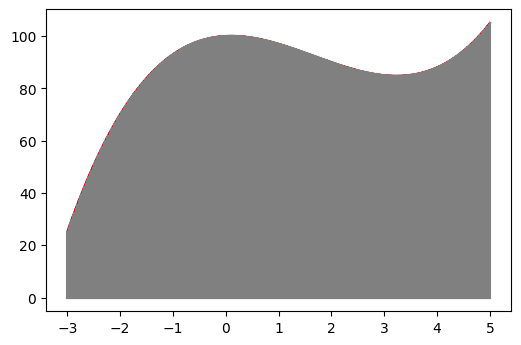

In [68]:
simp.plot()

Combinaciones lineales

In [7]:
a = 6
b = 8

N = 10

combinaciones_lineales = []

for r in range(-N,N):
    for s in range(-N,N):
        q = r*a+b*s
        if q not in combinaciones_lineales:
            combinaciones_lineales.append(q)

for j,x in enumerate(sorted(combinaciones_lineales)):
    print(x,end=' ')
    if (j+1)%14==0:
        print("\n",end="")

-140 -134 -132 -128 -126 -124 -122 -120 -118 -116 -114 -112 -110 -108 
-106 -104 -102 -100 -98 -96 -94 -92 -90 -88 -86 -84 -82 -80 
-78 -76 -74 -72 -70 -68 -66 -64 -62 -60 -58 -56 -54 -52 
-50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 
-22 -20 -18 -16 -14 -12 -10 -8 -6 -4 -2 0 2 4 
6 8 10 12 14 16 18 20 22 24 26 28 30 32 
34 36 38 40 42 44 46 48 50 52 54 56 58 60 
62 64 66 68 70 72 74 76 78 80 82 84 86 88 
90 92 94 96 98 100 102 104 106 108 110 112 114 118 
120 126 